In [133]:
%matplotlib inline
import cmlreaders as cml
import pandas_to_pybeh as pb
import numpy as np
import seaborn as sns

In [53]:
all_fr1_events = cml.CMLReader.load_events(experiments='FR1', data_type='task_events')

In [112]:
evs = all_fr1_events.query('type == ["WORD", "REC_WORD"]')
evs.replace({'serialpos': {-999: np.nan}}, inplace=True)
evs['serialpos'] = evs.groupby(['subject', 'session', 'list', 'item_name'])['serialpos'].ffill()

/home1/djhalp/.conda/envs/cml/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/home1/djhalp/.conda/envs/cml/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [113]:
# evs = evs.query('subject == "R1001P"')

In [114]:
rec_evs = evs.query('type == "REC_WORD"')
word_evs = evs.query('type == "WORD"')

In [115]:
n_recalls_df = rec_evs.groupby(['subject', 'session', 'list']
                              ).size().to_frame(name='n_recalls').reset_index()
max_n_recalls = n_recalls_df['n_recalls'].max()
lag_cols = ['lag_serialpos_' + str(period) 
            for period in range(1, (max_n_recalls+1))]

In [116]:
test_rec_df = test_rec_df[['intrusion', 'item_name', 'item_num', 'serialpos', 'session', 'list', 'subject', 'type']]
test_word_df = test_word_df[['item_name', 'item_num', 'serialpos', 'session', 'list', 'subject', 'type']]

In [117]:
#remove repetitions
rec_evs['repetition'] = rec_evs.groupby(
    ['session', 'list', 'subject', 'serialpos']).cumcount()
rec_evs.loc[rec_evs['repetition'] > 0, 'serialpos'] = np.nan

/home1/djhalp/.conda/envs/cml/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home1/djhalp/.conda/envs/cml/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [118]:
rec_evs['lag_serialpos'] = rec_evs.groupby(
    ['session', 'list', 'subject'])['serialpos'].shift()
for period in range(1, (max_n_recalls+1)):
    rec_evs['lag_serialpos_' + str(period)] = rec_evs.groupby(
        ['session', 'list', 'subject'])['serialpos'].shift(period)

/home1/djhalp/.conda/envs/cml/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home1/djhalp/.conda/envs/cml/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [119]:
recalls = rec_evs.merge(word_evs, 
                        on=['session', 'list', 'subject'],
                        suffixes=('_actual', '_possible'))

In [120]:
recalls['serialpos_impossible'] = recalls[lag_cols].isin(
    recalls['serialpos_possible']).any(1)

In [121]:
recalls.query('serialpos_impossible == False and serialpos_actual == serialpos_actual and lag_serialpos == lag_serialpos', inplace=True)

In [130]:
recalls

,eegfile_actual,eegoffset_actual,exp_version_actual,experiment_actual,intrusion_actual,is_stim_actual,item_name_actual,item_num_actual,list,montage_actual,...,recognized_possible,rectime_possible,rejected_possible,serialpos_possible,stim_list_possible,stim_params_possible,type_possible,serialpos_impossible,lag,actual
84,R1001P_FR1_0_12Oct14_1034,521777,1.02,FR1,0,False,SCHOOL,210,3,0.0,...,NaN,-999,NaN,1.0,False,[],WORD,False,-3.0,False
85,R1001P_FR1_0_12Oct14_1034,521777,1.02,FR1,0,False,SCHOOL,210,3,0.0,...,NaN,-999,NaN,2.0,False,[],WORD,False,-2.0,False
86,R1001P_FR1_0_12Oct14_1034,521777,1.02,FR1,0,False,SCHOOL,210,3,0.0,...,NaN,-999,NaN,3.0,False,[],WORD,False,-1.0,False
88,R1001P_FR1_0_12Oct14_1034,521777,1.02,FR1,0,False,SCHOOL,210,3,0.0,...,NaN,-999,NaN,5.0,False,[],WORD,False,1.0,False
89,R1001P_FR1_0_12Oct14_1034,521777,1.02,FR1,0,False,SCHOOL,210,3,0.0,...,NaN,-999,NaN,6.0,False,[],WORD,False,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557851,R1573T_FR1_0_27Jul21_1625,1009035,1.05,FR1,0,False,BROOM,36,8,0.0,...,-999.0,-999,-999.0,5.0,False,[],WORD,False,-5.0,False
557853,R1573T_FR1_0_27Jul21_1625,1009035,1.05,FR1,0,False,BROOM,36,8,0.0,...,-999.0,-999,-999.0,7.0,False,[],WORD,False,-3.0,False
557854,R1573T_FR1_0_27Jul21_1625,1009035,1.05,FR1,0,False,BROOM,36,8,0.0,...,-999.0,-999,-999.0,8.0,False,[],WORD,False,-2.0,False
557855,R1573T_FR1_0_27Jul21_1625,1009035,1.05,FR1,0,False,BROOM,36,8,0.0,...,-999.0,-999,-999.0,9.0,False,[],WORD,False,-1.0,False


In [122]:
recalls['lag'] = recalls['serialpos_possible'] - recalls['lag_serialpos']
recalls['actual'] = recalls['serialpos_actual'] == recalls['serialpos_possible']

In [123]:
# list_lag_crp_df = recalls.groupby(['subject', 'session', 'list', 'lag']
#                        ).agg({'actual': ['sum', 'count']})
# list_lag_crp_df.columns = ['actual_sum', 'actual_count']
# list_lag_crp_df = list_lag_crp_df.reset_index()
# list_lag_crp_df['prob'] = list_lag_crp_df['actual_sum'] / list_lag_crp_df['actual_count']
# sub_lag_crp_df = list_lag_crp_df.groupby(['subject', 'lag']).agg({'prob': 'mean'})

In [138]:
sess_lag_crp_df = recalls.groupby(['subject', 'session', 'lag']
                       ).agg({'actual': ['sum', 'count']})
sess_lag_crp_df.columns = ['actual_sum', 'actual_count']
sess_lag_crp_df = sess_lag_crp_df.reset_index()
sess_lag_crp_df['prob'] = sess_lag_crp_df['actual_sum'] / sub_lag_crp_df['actual_count']
sess_lag_crp_df.query('subject == "R1001P" and session == 0')

,subject,session,lag,actual_sum,actual_count,prob
0,R1001P,0,-11.0,0,1,0.000000
1,R1001P,0,-10.0,0,3,0.000000
2,R1001P,0,-9.0,0,5,0.000000
3,R1001P,0,-8.0,0,5,0.000000
4,R1001P,0,-7.0,0,7,0.000000
5,R1001P,0,-6.0,0,8,0.000000
6,R1001P,0,-5.0,1,9,0.111111
7,R1001P,0,-4.0,0,9,0.000000
8,R1001P,0,-3.0,1,16,0.062500
9,R1001P,0,-2.0,0,16,0.000000


In [139]:
ix = cml.CMLReader.get_data_index()
df_sess = ix.query('experiment == "FR1"').iloc[0]
events = cml.CMLReader(subject=df_sess['subject'], experiment=df_sess['experiment'], 
                       session=df_sess['session'], localization=df_sess['localization'], 
                       montage=df_sess['montage']
                      ).load('task_events')
events.groupby('subject').apply(pb.pd_crp, itemno_column="item_num").reset_index()

,subject,level_1,prob,lag
0,R1001P,-5,0.111111,-5
1,R1001P,-4,0.000000,-4
2,R1001P,-3,0.062500,-3
3,R1001P,-2,0.000000,-2
4,R1001P,-1,0.117647,-1
5,R1001P,0,NaN,0
6,R1001P,1,0.285714,1
7,R1001P,2,0.111111,2
8,R1001P,3,0.117647,3
9,R1001P,4,0.266667,4


In [ ]:
sub_lag_crp_df = recalls.groupby(['subject', 'session', 'lag']
                       ).agg({'actual': ['sum', 'count']})
sub_lag_crp_df.columns = ['actual_sum', 'actual_count']
sub_lag_crp_df = sub_lag_crp_df.reset_index()
sub_lag_crp_df['prob'] = sess_lag_crp_df['actual_sum'] / sub_lag_crp_df['actual_count']
sess_lag_crp_df.query('subject == "R1001P" and session == 0')

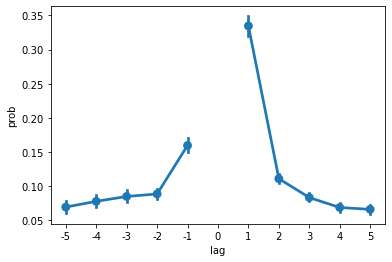

In [137]:
g = sns.pointplot(x='lag', y='prob', 
                  data=sub_lag_crp_df.query('lag <= 5 and lag >= -5'), 
                  order=[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])